# Liquid Studio Technical Challenge

### Martin Cheung

The following notebook documents the code that was used for the liquid studio technical challenge. It consists of a dataset from the Brazilian aviation agency, containing the history of all flights in 2017. With regard to this dataset, liquid studio have posed a number of questions to be answered.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

### Read in Flight Data

In [2]:
flight_data = pd.read_csv("2017_flights.csv", parse_dates=['ArrivalActual','ArrivalScheduled','DepartureActual','DepartureScheduled'])

C:\Users\martin.cheung\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,11,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
flight_data.head()

,Airline,ArrivalActual,ArrivalAirport,ArrivalScheduled,DepartureActual,DepartureAirport,DepartureScheduled,FlightNo,FlightStatus,IDCode,...,ArrivalAirportName,ArrivalCity,ArrivalState,ArrivalCountry,ArrivalContinent,AirlineName,AirlineOrigin,FlightType,RouteType,StatusReasonDescription
0,AAL,2017-02-01 09:00:00,SBBR,2017-02-01 09:00:00,2017-02-01 01:20:00,KMIA,2017-02-01 01:20:00,213,REALIZADO,0,...,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
1,AAL,2017-01-24 09:00:00,SBBR,2017-01-24 09:00:00,2017-01-24 01:20:00,KMIA,2017-01-24 01:20:00,213,REALIZADO,0,...,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
2,AAL,2017-01-29 09:00:00,SBBR,2017-01-29 09:00:00,2017-01-29 01:20:00,KMIA,2017-01-29 01:20:00,213,REALIZADO,0,...,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
3,AAL,2017-01-23 09:00:00,SBBR,2017-01-23 09:00:00,2017-01-23 01:20:00,KMIA,2017-01-23 01:20:00,213,REALIZADO,0,...,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN
4,AAL,2017-01-25 09:00:00,SBBR,2017-01-25 09:00:00,2017-01-25 01:20:00,KMIA,2017-01-25 01:20:00,213,REALIZADO,0,...,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,DF,BRASIL,AMERICA DO SUL,AMERICAN AIRLINES INC,ESTRANGEIRA,Vôo Regular,Internacional,NaN


In [4]:
flight_data.drop_duplicates().shape

(1105484, 27)

In [5]:
flight_data.dtypes

Airline                            object
ArrivalActual              datetime64[ns]
ArrivalAirport                     object
ArrivalScheduled           datetime64[ns]
DepartureActual            datetime64[ns]
DepartureAirport                   object
DepartureScheduled         datetime64[ns]
FlightNo                            int64
FlightStatus                       object
IDCode                             object
RouteCode                          object
StatusReason                       object
DepartureAirportName               object
DepartureCity                      object
DepartureState                     object
DepartureCountry                   object
DepartureContinent                 object
ArrivalAirportName                 object
ArrivalCity                        object
ArrivalState                       object
ArrivalCountry                     object
ArrivalContinent                   object
AirlineName                        object
AirlineOrigin                     

### 1. What are the busiest airports in Brazil? What are the busiest routes between cities?

In [6]:
# Airport with most departures in 2017
(flight_data.groupby(["DepartureAirportName","DepartureCity"])
    .size()
    .reset_index(name='counts')
    .sort_values('counts',ascending=False)
    .head())

,DepartureAirportName,DepartureCity,counts
96,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,132753
51,CONGONHAS,SÃO PAULO,92797
184,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,66411
236,VIRACOPOS,CAMPINAS,66261
5,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,60601


In [7]:
# Airport with most arrivals in 2017
(flight_data.groupby(["ArrivalAirportName","ArrivalCity"])
    .size()
    .reset_index(name='counts')
    .sort_values('counts',ascending=False)
    .head())

,ArrivalAirportName,ArrivalCity,counts
98,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,133030
54,CONGONHAS,SÃO PAULO,93191
186,PRESIDENTE JUSCELINO KUBITSCHEK,BRASÍLIA,66168
239,VIRACOPOS,CAMPINAS,65933
5,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,RIO DE JANEIRO,60942


* The busiest airport with most departures and arrivals in 2017 is Guarulhos Airport in Sao Paulo, and the 2nd busiest is Congonhas also in Sao Paulo.

In [8]:
# Busiest Routes in 2017
(flight_data.groupby(['DepartureCity','ArrivalCity'])
    .size()
    .reset_index(name='counts')
    .sort_values('counts',ascending=False)
    .head(10))

,DepartureCity,ArrivalCity,counts
2315,SÃO PAULO,RIO DE JANEIRO,24873
1951,RIO DE JANEIRO,SÃO PAULO,24798
1040,GUARULHOS,RIO DE JANEIRO,9597
1904,RIO DE JANEIRO,GUARULHOS,9565
320,BRASÍLIA,RIO DE JANEIRO,8344
2285,SÃO PAULO,BRASÍLIA,8282
336,BRASÍLIA,SÃO PAULO,8280
1881,RIO DE JANEIRO,BRASÍLIA,8272
712,CONFINS,SÃO PAULO,8081
2292,SÃO PAULO,CONFINS,7940


* The busiest routes in Brazil are Sao Paulo <-> Rio De Janeiro and Guarulhos (note this is also in Sao Paulo) <-> Rio De Janeiro.

### 2. Can you estimate how many people have flown in Brazil on any given day in 2017?

In [9]:
# Assume we are just looking at 'Voo Regular' type of flight
flight_data.groupby(['FlightType']).size().reset_index(name='counts').sort_values('counts',ascending=False)

,FlightType,counts
2,Vôo Regular,1043368
10,Vôo extra sem HOTRAN,37050
0,Inclusão de etapa em um vôo previsto em HOTRAN,9541
4,Vôo de Serviço,4897
3,Vôo charter,4270
6,Vôo de fretamento,2486
8,Vôo de retorno,1754
9,Vôo extra com HOTRAN,1720
5,Vôo de experiência,211
1,Vôo Cargueiro,186


In [10]:
# Get only scheduled departure dates of flights
flight_data['date'] = flight_data['ArrivalScheduled'].dt.date

In [11]:
# Get mean number of regular flights per day
startdate = pd.to_datetime("2017-01-01").date()
enddate = pd.to_datetime("2017-12-31").date()
(flight_data[(flight_data['date'] > startdate) & (flight_data['date'] < enddate)]
    .query('FlightType=="Vôo Regular"')
    .groupby(['date','FlightType'])
    .size().reset_index(name='counts')
    .counts.mean())

2859.0881542699726

- For the estimate, we will only use the most common 'Regular Flights', since the others (eg. service, cargo and return flights don't carry many people). Therefore, a there are a total of ~1,040,000 flights in 2017, and the average number of flights per day is 2859. 
- Let's estimate on average there are 100 passengers on each flight, since most flights are smaller domestic flights. Therefore, there are ~285,900 people flying in Brazil per day.

### 3. Can you find a way to distinguish touristic destinations from business destinations in this dataset?
* To find touristic cities, I will look at arrival city only
* Touristic destinations will have a seasonal fluctuation: exhibit increase in flights during the peak holiday season (Dec-March)
* Business destinations - mostly steady throughout the year, with weekly seasonality, business people would likely travel on weekdays and be home on weekends. Drastic difference in weekday vs weekend flights
* Tourist cities: Foz Do Iguacu, Salvador, Manaus
* Business cities: Sao Paulo, Rio, Brasilia

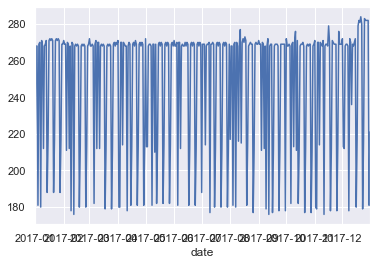

In [12]:
# Sao Paulo: Volume of flights by Arrival City and Date
saopaulo_trend = (flight_data
    .query('ArrivalCity=="SÃO PAULO"')
    .groupby(['date'])
    .size().reset_index(name='counts')
    .sort_values('counts',ascending=False))
saopaulo_trend.plot('date','counts',legend=None)

In [14]:
# Sao Paulo arrivals by dayofweek
flight_data['DayOfWeek'] = flight_data["DepartureScheduled"].dt.day_name()
saopaulo_dayofweek = (flight_data
    .query('ArrivalCity=="SÃO PAULO"')
    .groupby(["DayOfWeek"])
    .agg("size")
    .reset_index(name="count"))

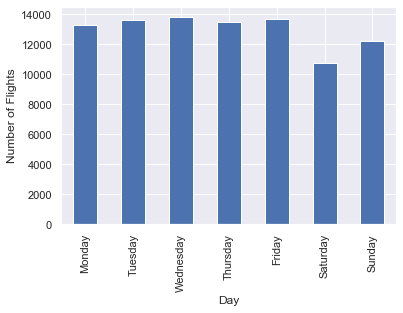

In [15]:
order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

saopaulo_dayofweek.set_index('DayOfWeek').loc[order].reset_index().plot(kind='bar',x='DayOfWeek',y='count',legend=None)
plt.xlabel('Day')
plt.ylabel('Number of Flights')
plt.show()

For Sao Paulo, there is a weekly seasonality with business travellers flying on weekdays and staying home on weekends

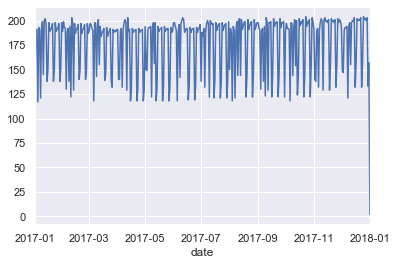

In [16]:
brasilia_trend = (flight_data
    .query('ArrivalCity=="BRASÍLIA"')
    .groupby(['date'])
    .size().reset_index(name='counts')
    .sort_values('counts',ascending=True))
brasilia_trend.plot('date','counts',legend=None)

Brasilia has a similar pattern to Sao Paulo

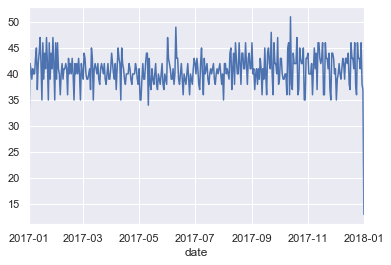

In [17]:
manaus_trend = (flight_data
    .query('ArrivalCity=="MANAUS"')
    .groupby(['date'])
    .size().reset_index(name='counts')
    .sort_values('counts',ascending=True))
manaus_trend.plot('date','counts',legend=None)

Manaus is a tourist city near the Amazon, and we can see that it fluctuates much more over the year, as opposed to the stable, weekly up-and-down of a business city. 

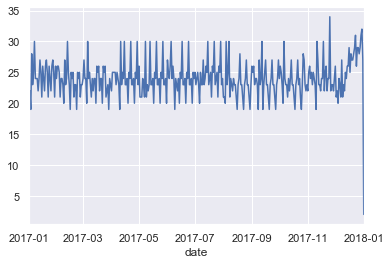

In [18]:
iguacu_trend = (flight_data
    .query('ArrivalCity=="FOZ DO IGUAÇU"')
    .groupby(['date'])
    .size().reset_index(name='counts')
    .sort_values('counts',ascending=True))
iguacu_trend.plot('date','counts',legend=None)

Foz do Iguacu (Iguazu Falls) is one of the biggest tourist sites in Brazil. Definitely peaking during the high christmas/newyear season

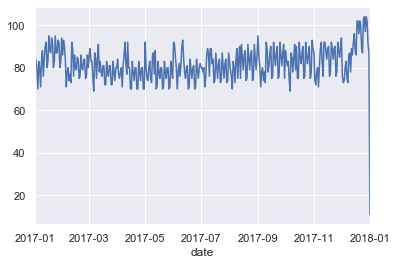

In [19]:
salvador_trend = (flight_data
    .query('ArrivalCity=="SALVADOR"')
    .groupby(['date'])
    .size().reset_index(name='counts')
    .sort_values('counts',ascending=True))
salvador_trend.plot('date','counts',legend=None)

Similar for Salvador. Obvious peak around February is the Carnaval

### 4. What is the likelihood that a flight is going to be delayed given a departure airport, airline, month, day of the week, and scheduled departure hour?

#### Solution: 
Build a model to predict y, flight delay, given x variables: airport, airline, month, day and hour

#### Output: 
A list of probabilities for each combination of airport, airline, month, day and hour

#### Feature Engineering

In [20]:
# Remove null values from scheduled deparature and actual departure or else we can't get the target variable
flight_data = flight_data[flight_data["DepartureActual"].notnull() & flight_data["DepartureScheduled"].notnull()]

# Create target variable for flight delay (actual flight time is after scheduled time)
flight_data["FlightDelayed"] = np.where(flight_data["DepartureActual"] > flight_data["DepartureScheduled"], 1, 0)

In [21]:
# Create Features for hour, day and month
flight_data['DepartureMonth'] = flight_data["DepartureScheduled"].dt.month
flight_data['DepartureHour'] = flight_data["DepartureScheduled"].dt.hour
flight_data['DayOfWeek'] = flight_data["DepartureScheduled"].dt.day_name()

In [22]:
# Select Only Required Columns
model_data = flight_data[["DepartureAirportName","AirlineName","DepartureMonth","DepartureHour","DayOfWeek","FlightDelayed"]]

# Check features
model_data.head()

,DepartureAirportName,AirlineName,DepartureMonth,DepartureHour,DayOfWeek,FlightDelayed
0,MIAMI INTERNATIONAL AIRPORT,AMERICAN AIRLINES INC,2,1,Wednesday,0
1,MIAMI INTERNATIONAL AIRPORT,AMERICAN AIRLINES INC,1,1,Tuesday,0
2,MIAMI INTERNATIONAL AIRPORT,AMERICAN AIRLINES INC,1,1,Sunday,0
3,MIAMI INTERNATIONAL AIRPORT,AMERICAN AIRLINES INC,1,1,Monday,0
4,MIAMI INTERNATIONAL AIRPORT,AMERICAN AIRLINES INC,1,1,Wednesday,0


#### Quick EDA

In [23]:
# 760102 out of 929924 (81.7%) flights are delayed
model_data.groupby("FlightDelayed").size()

FlightDelayed
0    760102
1    169822
dtype: int64

In [26]:
# 193 Different Departure Airports
model_data["DepartureAirportName"].nunique()

193

In [27]:
# Departure Month vs Delays
df3 = (model_data
    .groupby(["DepartureMonth","FlightDelayed"])
    .agg("size"))
    
percentage_delays_month = (df3 / df3.groupby(level=0).sum()).reset_index(name='percentage').query('FlightDelayed==1')

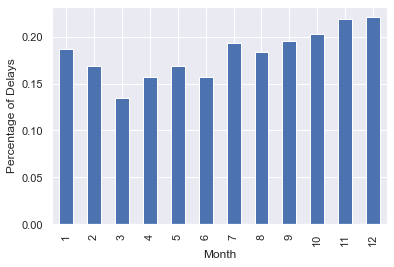

In [28]:
percentage_delays_month.plot(kind='bar',x='DepartureMonth',y='percentage',legend=None)
plt.xlabel('Month')
plt.ylabel('Percentage of Delays')
plt.show()

* We see lowest delays in March and gradually increases to peak in Oct-Dec

In [29]:
# Departure Month vs Delays
df4 = (model_data
    .groupby(["DepartureHour","FlightDelayed"])
    .agg("size"))
    
percentage_delays_hour = (df4 / df4.groupby(level=0).sum()).reset_index(name='percentage').query('FlightDelayed==1')

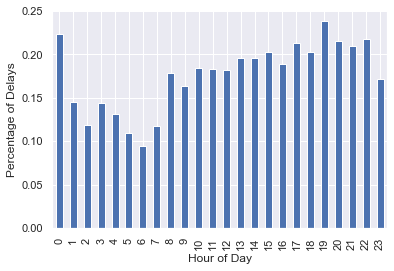

In [30]:
percentage_delays_hour.plot(kind='bar',x='DepartureHour',y='percentage',legend=None)
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Delays')
plt.show()

* Least delays occur between 1-7am, and highest portion of delays occur at 5-11pm. Also a large portion of delays occur between 12-1am?

In [31]:
# Departure dayofweek vs Delays
df5 = (model_data
    .groupby(["DayOfWeek","FlightDelayed"])
    .agg("size"))
    
percentage_delays_day = (df5 / df5.groupby(level=0).sum()).reset_index(name='percentage').query('FlightDelayed==1')

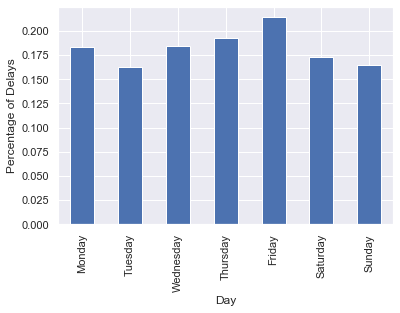

In [32]:
order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

percentage_delays_day.set_index('DayOfWeek').loc[order].reset_index().plot(kind='bar',x='DayOfWeek',y='percentage',legend=None)
plt.xlabel('Day')
plt.ylabel('Percentage of Delays')
plt.show()

* Friday is when percentage of delays peaks

Takeaways from EDA:
* Unbalance in target variable ~20-80 : delay-notdelay
* Some relationships between the hour, day of week and month with flight delays, but mostly won't by themselves give us confidence on whether flight is delayed
* There are 193 airports in total, so would be better to reduce these categories down (eg. use State instead)

#### Build Model
- Build random forest model on the features above

In [33]:
# One hot encoding
model_data_onehot = pd.get_dummies(model_data)

In [34]:
X = model_data_onehot.loc[:, model_data_onehot.columns != 'FlightDelayed']
y = model_data_onehot['FlightDelayed']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [45]:
# Randomforest classifier
rf_model=RandomForestClassifier(n_estimators=100)

#Train the model on train set
rf_model.fit(X_train,y_train)

In [48]:
# Output probabilities
y_prob = rf_model.predict_proba(X_test)

# Output Delay/NotDelay predictions
y_pred = rf_model.predict(X_test)

In [49]:
y_prob

array([[0.72097952, 0.27902048],
       [0.89027183, 0.10972817],
       [1.        , 0.        ],
       ...,
       [0.77652528, 0.22347472],
       [0.88325928, 0.11674072],
       [0.98416667, 0.01583333]])

In [50]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model AUC
print("AUC:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.7978514434829986
AUC: 0.550957071957189


#### Ways to Improve Model
- balance the dataset since it is 20-80 delay-notdelay: upsampling, downsampling or SMOTE
- do more feature engineering 
    - encode the cyclical nature of time features so that 2330 is close to 0030 (use sine/cos transforms)
    - reduce number of categories for airport variable - use departure state (193 down to 27), perhaps group rare levels into 'other'  
    - introduce other features like weather, delayed incoming flight, busyness of airport

### 5. Can you use your model/system from Question 4 to help me arrive at the airport within 30 minutes before departure at the airport? Can your system/model guarantee that 90% of the time I will not be waiting for longer than 1 hour or miss my flight?

#### Solution:
- To solve this problem, we should change to a regression problem, so we are predicting length in minutes of delay rather than delay/notdelay. 
- We can predict how many minutes a flight is delayed and give a 90% confidence window of the length of delay. Therefore, we output a prediction interval of when the flight will arrive.
- If the width of the 90% prediction interval is less than 1 hour, then we can make the guarantee

Below is the formula to calculate a prediction interval using a multiple linear regression (from https://newonlinecourses.science.psu.edu/stat501/node/315/):

<img src="predictioninterval.png">

### 6. I live in the city of Porto Alegre, Brazil and I want to visit all airports in the country. In 2017, what is the quickest way that I could have achieved this?
- Travelling Salesman Problem: will do simple non-optimal nearest neighbours solution

Steps:
1. Remove outlier flights where the flight time is super short or super long and only for domestic flights
2. Get average time in min between 2 cities in Brazil
3. Run Algorithm

Algorithm (based on nearest neighbour):
1. Set start city to PORTO ALEGRE and append to city_sequence
2. Create set of all unique unvisited cities in brazil
3. Remove current city from unvisited cities
4. From the current city, list all the options of destinations we can fly to
5. If new destinations exist, select an unvisited city that is closest to the current city. Append this to city_sequence
6. If no new destinations exist, go back to previous city. Append this to city_sequence
7. Repeat Steps 4-6, until unvisited cities are exhausted

Note: My algorithm doesn't actually work. I was hoping to use the simplest nearest neighbour heuristic to create a flight route. It gets stuck and just ends up flying back and forth between 2 small cities; because you can't just fly to any city from your current city, you are constrained by the routes that are flown by the airlines.

In [98]:
brazil_flights = flight_data.query('DepartureCountry=="BRASIL" & ArrivalCountry=="BRASIL"')
brazil_flights['FlightTimeMin'] = (brazil_flights['ArrivalActual'] - brazil_flights['DepartureActual']).dt.total_seconds()/60.0

C:\Users\martin.cheung\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
# We have some weird flight times for some flights - crazy high negative or positive flight times
brazil_flights.FlightTimeMin.describe()

count    760724.000000
mean         82.172295
std       16165.142451
min     -465078.000000
25%          67.000000
50%          90.000000
75%         126.000000
max       44700.000000
Name: FlightTimeMin, dtype: float64

In [241]:
# Make sure to remove routes with negative/tiny flight times and also flight times way too high
# ie. flight times should be more than 30 min long and less than 1000min
# National flights only
brazil_flights = (brazil_flights
    .sort_values('FlightTimeMin')
    .query('FlightTimeMin > 30 & FlightTimeMin < 1000 & RouteType=="Nacional"'))

In [242]:
# The Around the Brazil trip will cover 108 cities
brazil_flights['ArrivalCity'].nunique()

108

In [278]:
# Get Average flight times between cities.
# Note we have 800 possible flight routes
city_travel_times = (brazil_flights
    .groupby(['DepartureCity','ArrivalCity'])['FlightTimeMin']
    .agg(["mean","count"])
    .reset_index()
    .rename(columns={"mean": "AveFlightTimeMin","count":"Total_Flights"}))

city_travel_times.head()

,DepartureCity,ArrivalCity,AveFlightTimeMin,Total_Flights
0,ALTA FLORESTA,VÁRZEA GRANDE,75.006757,148
1,ALTAMIRA,BELÉM,79.912281,456
2,ALTAMIRA,ITAITUBA,71.500000,68
3,ALTAMIRA,ORIXIMINÁ,72.500000,4
4,ALTAMIRA,SANTARÉM,52.976190,42


In [1]:
# Set of cities
cities = set(city_travel_times['ArrivalCity'].append(city_travel_times['DepartureCity']))
cities.head()

NameError: name 'city_travel_times' is not defined

#### Algorithm Solution

In [280]:
start = "PORTO ALEGRE"
city_sequence = [start] # this lists the order which we fly to each city
unvisited = set(cities - {start}) # this is the unique set of unvisited cities
while unvisited:
    # Check flight options available
    # - if a flight to an unvisited city is available, then fly there
    # - if flight to unvisited city is not available, then fly back to previous city or fly to sao paulo?
    flight_options = (city_travel_times.loc[(city_travel_times['DepartureCity']==city_sequence[-1])
                                            & (city_travel_times['ArrivalCity'].isin(unvisited))]) 
    
    if not flight_options.empty:
        next_city = flight_options.loc[flight_options['AveFlightTimeMin'].idxmin()]['ArrivalCity']
        unvisited.remove(next_city)
    else:
        next_city = city_sequence[-2]
    
    city_sequence.append(next_city)

# Note algorithm will run, but get stuck going back and forth 2 cities

KeyboardInterrupt: 

Below is the outputted sequence of cities from the above algorithm

In [292]:
city_sequence

['PORTO ALEGRE',
 'PELOTAS',
 'PORTO ALEGRE',
 'FLORIANÓPOLIS',
 'SÃO JOSÉ DOS PINHAIS',
 'LONDRINA',
 'SÃO PAULO',
 'AREALVA',
 'MARÍLIA',
 'CAMPINAS',
 'RIBEIRÃO PRETO',
 'RIO DE JANEIRO',
 'CAMPOS DOS GOYTACAZES',
 'RIO DE JANEIRO',
 'VITÓRIA',
 'CONFINS',
 'SANTANA DO PARAÍSO',
 'CONFINS',
 'GOVERNADOR VALADARES',
 'CONFINS',
 'VARGINHA',
 'CONFINS',
 'MONTES CLAROS',
 'GUARULHOS',
 'JOINVILLE',
 'GUARULHOS',
 'NAVEGANTES',
 'GUARULHOS',
 'UBERLÂNDIA',
 'BELO HORIZONTE',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 'ARAXÁ',
 'UBERABA',
 '